In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=AMIR-PC\SQLEXPRESS;'
                      'Database=training_project;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

print('Connected to SQL Server')

Connected to SQL Server


In [127]:
df = pd.read_sql_query('''
                SELECT * 
                FROM Student_Personal
                LEFT JOIN Student_Marks ON Student_Personal.Std_ID = Student_Marks.Std_ID
                    ''', conn)


df.head(10)


,Std_ID,Std_Name,Std_DOB,Std_Age,Std_Street,Std_State,Std_Country,Std_Postcode,Std_Phone,Std_Email,...,English,Science,Maths,Arts,History,Geography,Total,Average,Result,Grade
0,101,Preeta a/l Merican,1979-03-31,43,No. 36 Jln Yong Shook Lin Seksyen 52,Selangor,Malaysia,46200,0125551111,preeta@gmail.com,...,60,52,62,99,33,57,448,64.0,PASS,C
1,102,Siauw Koong Cheng,1980-06-01,42,13A Jln Pudu Ulu,Kuala Lumpur,Malaysia,56100,0125551112,siauw@gmail.com,...,65,75,35,78,31,43,382,54.0,PASS,D
2,103,Muhammad Haji Syed Aidi,1980-10-19,41,1 6 Jln Pjs 11/8 Taman Bandar Sunway,Selangor,Malaysia,46150,0125551113,muhammad@gmail.com,...,81,56,77,65,29,73,469,67.0,PASS,C
3,104,Veloo Munusamy,1980-11-23,41,32B Jalan Pekaka 8/3 Kota Damansara,Selangor,Malaysia,47810,0125551114,veloo@gmail.com,...,95,64,92,60,47,22,402,57.0,PASS,D
4,105,Philip Nguei Ong Khoi,1981-06-10,41,No. 8 Jalan 4/91A Taman Shamelin Perkasa Batu,Kuala Lumpur,Malaysia,56100,0125551115,philip@gmail.com,...,74,25,75,43,39,90,374,53.0,PASS,D
5,106,Noor Zulaikha Rosnan binti Syawal,1981-07-06,41,9-1 Jalan 13/142 Taman Orkid Desa,Kuala Lumpur,Malaysia,56000,0125551116,noor@gmail.com,...,76,89,37,66,28,61,439,62.0,PASS,C
6,107,Muhammed Wan Muazzam Zulkernain,1982-06-01,40,18 Jln Lapangan Terbang Lama,Kuala Lumpur,Malaysia,50460,0125551117,muhammed@gmail.com,...,65,24,65,47,38,24,303,43.0,FAIL,F
7,108,Selva Muniandy,1984-08-14,38,"Jalan 20/7, Paramount Garden",Selangor,Malaysia,46300,0125551118,selva@gmail.com,...,20,21,48,57,58,95,389,55.0,PASS,D
8,109,Daniel Seah Zeng Shing,1985-03-06,37,"Perdana Business Centre, Bandar Damansara Perdana",Selangor,Malaysia,47820,0125551119,daniel@gmail.com,...,91,37,67,38,23,30,357,51.0,PASS,D
9,110,Viatilingam Vadiveloo,1986-12-02,35,"No 142-146, Jalan Tuanku Abdul Rahman",Kuala Lumpur,Malaysia,50100,0125551120,viatilingam@gmail.com,...,64,25,37,54,31,59,313,44.0,FAIL,F


In [130]:
df_marks = pd.read_sql_query('''
                SELECT Student_Personal.Std_ID, Student_Personal.Std_Name, Student_Marks.Malay, Student_Marks.English, Student_Marks.Science, Student_Marks.Maths, Student_Marks.Arts, Student_Marks.History, Student_Marks.Geography
                FROM Student_Personal
                LEFT JOIN Student_Marks ON Student_Personal.Std_ID = Student_Marks.Std_ID
                    ''', conn)

df_marks.head(10)


,Std_ID,Std_Name,Malay,English,Science,Maths,Arts,History,Geography
0,101,Preeta a/l Merican,85,60,52,62,99,33,57
1,102,Siauw Koong Cheng,55,65,75,35,78,31,43
2,103,Muhammad Haji Syed Aidi,88,81,56,77,65,29,73
3,104,Veloo Munusamy,22,95,64,92,60,47,22
4,105,Philip Nguei Ong Khoi,28,74,25,75,43,39,90
5,106,Noor Zulaikha Rosnan binti Syawal,82,76,89,37,66,28,61
6,107,Muhammed Wan Muazzam Zulkernain,40,65,24,65,47,38,24
7,108,Selva Muniandy,90,20,21,48,57,58,95
8,109,Daniel Seah Zeng Shing,71,91,37,67,38,23,30
9,110,Viatilingam Vadiveloo,43,64,25,37,54,31,59


In [159]:
df_marks_only = pd.read_sql_query('''
                SELECT Student_Marks.Malay, Student_Marks.English, Student_Marks.Science, Student_Marks.Maths, Student_Marks.Arts, Student_Marks.History, Student_Marks.Geography
                FROM Student_Personal
                LEFT JOIN Student_Marks ON Student_Personal.Std_ID = Student_Marks.Std_ID
                    ''', conn)

df_marks_only.head(10)

,Malay,English,Science,Maths,Arts,History,Geography
0,85,60,52,62,99,33,57
1,55,65,75,35,78,31,43
2,88,81,56,77,65,29,73
3,22,95,64,92,60,47,22
4,28,74,25,75,43,39,90
5,82,76,89,37,66,28,61
6,40,65,24,65,47,38,24
7,90,20,21,48,57,58,95
8,71,91,37,67,38,23,30
9,43,64,25,37,54,31,59


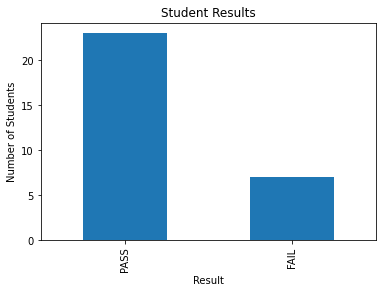

In [37]:
fails = df['Result'].value_counts()
fails.plot.bar()

plt.title('Student Results')
plt.xlabel('Result')
plt.ylabel('Number of Students')

plt.savefig('./output/student-result.png')
plt.show()


In [35]:
df['Result'].value_counts()

PASS    23
FAIL     7
Name: Result, dtype: int64

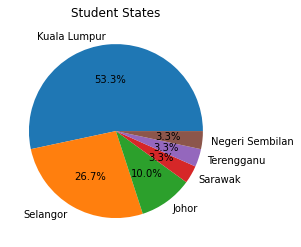

In [20]:
states = df['Std_State'].value_counts()

plt.pie(states, labels = states.index, autopct='%.1f%%')
plt.title('Student States')

plt.savefig('./output/student-state.png')
plt.show()

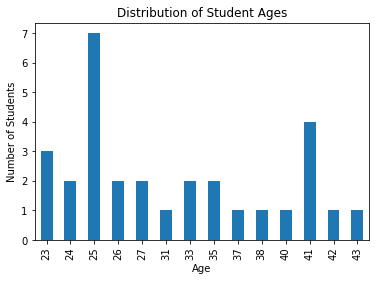

In [21]:
age = df['Std_Age'].value_counts().sort_index()
age.plot.bar()

plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Number of Students')

plt.savefig('./output/student-age-distribution.png')
plt.show()


In [9]:
highest = df['Malay'].max()
print(df[df['Malay'] == highest])

   Std_ID        Std_Name     Std_DOB  Std_Age  \
19   120   Thong Khaw Lui  1996-12-11       25   

                         Std_Street Std_State Std_Country  Std_Postcode  \
19  1 Jln Temenggong Kangkar Tebrau     Johor    Malaysia         81100   

     Std_Phone        Std_Email  ... English  Science  Maths  Arts  History  \
19  0125551130  thong@gmail.com  ...      91       91     98    99       85   

    Geography  Total  Average  Result  Grade  
19         55    618     88.0    PASS      A  

[1 rows x 22 columns]


In [183]:
lowest = df_marks['Malay'].min()
print(df_marks[df_marks['Malay'] == lowest])

  Std_ID        Std_Name  Malay  English  Science  Maths  Arts  History  \
3   104   Veloo Munusamy     22       95       64     92    60       47   

   Geography  
3         22  


In [106]:
min = df['Malay'].idxmin()
name = df['Std_Name'][min]

print(name, min)

Veloo Munusamy 3


In [44]:
for col in df_marks.columns:
    print(col)

Std_ID
Std_Name
Malay
English
Science
Maths
Arts
History
Geography


In [69]:
index = list(df_marks.columns)

print(index)

['Std_ID', 'Std_Name', 'Malay', 'English', 'Science', 'Maths', 'Arts', 'History', 'Geography']


In [96]:
for i in index[2:]:
    max = df_marks[i].idxmax()
    max_name = df_marks['Std_Name'][max]
    max_marks = df_marks[i][max]
    
    min = df_marks[i].idxmin()
    min_name = df_marks['Std_Name'][min]
    min_marks = df_marks[i][min]

    print('Highest:\t',max_name, ',', max_marks)
    print('Lowest:\t',min_name, ',', min_marks)
    print()

Highest:	 Thong Khaw Lui , 99
Lowest:	 Veloo Munusamy , 22

Highest:	 Chan Ong Tew , 100
Lowest:	 Selva Muniandy , 20

Highest:	 Lim Ceh Khoo , 95
Lowest:	 Selva Muniandy , 21

Highest:	 Thong Khaw Lui , 98
Lowest:	 Renuga a/l Govindasamy , 26

Highest:	 Preeta a/l Merican , 99
Lowest:	 Yeong Chia Shi , 21

Highest:	 Leow Say Shee , 98
Lowest:	 Daniel Seah Zeng Shing , 23

Highest:	 Siow Feng Shei , 96
Lowest:	 Veloo Munusamy , 22



In [107]:
top = df['Total'].idxmax()
name = df['Std_Name'][top]

print('Best student: ', name)

Best student:  Thong Khaw Lui


In [161]:
for i in index[2:]:
    sum = df_marks[i].sum()
    print(i, sum)

Malay 1800
English 1869
Science 1604
Maths 1829
Arts 1875
History 1719
Geography 1640


In [160]:
sum_of_cols = df_marks_only.sum(axis=0)
print(sum_of_cols)

Malay        1800
English      1869
Science      1604
Maths        1829
Arts         1875
History      1719
Geography    1640
dtype: int64


In [184]:
sum_of_cols.min()

1604

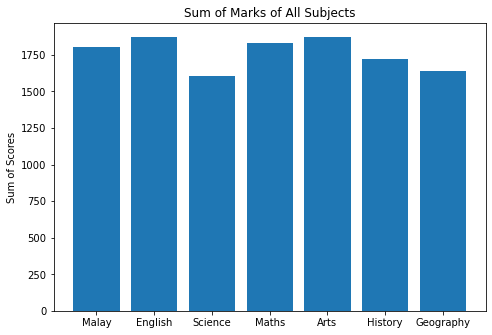

In [170]:
fig = plt.figure()

subject = sum_of_cols.index
students = sum_of_cols.values

ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Sum of Scores')
ax.set_title('Sum of Marks of All Subjects')

ax.bar(subject,students)
plt.savefig('./output/marks-sum.png')
plt.show()